# Tarea #3

### Librerias

In [46]:
import numpy as np
import matplotlib.pyplot as plt

### Apartado (d)

In [25]:
#Se crea una función del potencial V(x) -> Vn

def V(x):
    
    #Función original
    
    return (x**2)/2

def Vn(n,h):
    
    #Función cuantizada
    
    return (h**2 * n**2)/2
    
def Vi(h):
    
    #Se crea una lista del potencial Vi para todos los puntos xi. Donde 0 a 500 reccorre el dominio de n de -500 a 0 y 
    #de 500 a 1000 recorre el dominio de n de 0 a 500. Para hallar x solo de usa que x = h*n.
    
    Vi = [Vn(i,h) for i in range(-500,501)]
    
    return Vi


In [26]:
print(V(3))
print(Vn(300,0.01))
Vi(0.01)
print(Vi(0.01)[500+300])

4.5
4.5
4.5


### Apartado (e)

In [51]:
# Se crea una lista con los valores de Ψ para n desde -500 a 500 teniendo en cuenta la discretizacion h y una energía E.

In [189]:
def psi(h,E):
    
    #Se crea la parte de la derecha
    psi_r = []
    psi_0 = 0 
    psi_1 = 1e-5
    
    psi_r.append(psi_0)
    psi_r.append(psi_1)
    
    for i in range(2,501):
        
        n = i - 1 # n=1 cuando i = 2 por ejemplo
        
        num = 2*(1 + ((5* h**2)/12) * ( (h*n)**2 - 2*E ) )*psi_r[n] - (1 - ((h**2)/12) * ((h * (n-1))**2 - 2*E ) )*psi_r[n-1]
        den = 1 - ((h**2)/12) * ((h * (n+1))**2 - 2*E ) 
        
        frac = num/den
        
        psi_r.append(frac)
    
    
    #Se crea la parte de la izquierda
    psi_l = []
    psi_0 = 0 
    psi_1 = 1e-5
    
    psi_l.append(psi_1)
    psi_l.append(psi_0)
    
    for n in range(0,-500,-1):
        
        num = 2*(1 + ((5* h**2)/12) * ( (h*n)**2 - 2*E ) )*psi_l[-n+1] - (1 - ((h**2)/12) * ((h * (n+1))**2 - 2*E ) )*psi_l[-n]
        den = 1 - ((h**2)/12) * ((h * (n-1))**2 - 2*E ) 
        
        frac = num/den
        
        psi_l.append(frac)
    
    # Se quitan los datos repetidos de psi_l el n = 0 y el n =1 y se voltea
    
    psi_l = psi_l[2:]
    psi_l.reverse()
    
    # Se suman las listas
    
    psi = psi_l + psi_r
    
    return psi

In [324]:
h = 0.01
E = 0.5*3

p = psi(h,E)

x = [n*h for n in range(-500,501)]

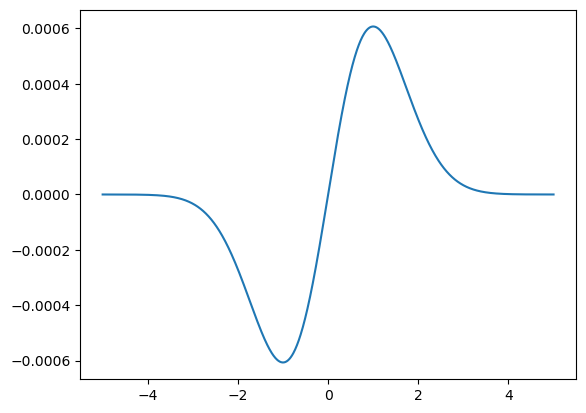

In [325]:
plt.plot(x,p)

In [ ]:
#Constantes
N=1000
xmin = -5
xmax = 5
x = np.linspace(xmin,xmax, N)
div_val = (x[-1] - x[0]) / (N - 1)
     
#Función para calcular el potencial
def Potential(x):
    pot = ((x**2)/2)
    return pot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


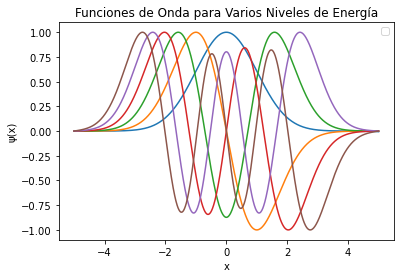

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes

n=1000
m = 1
w = 1
x = np.linspace(-5,5, 1000)
h = (x[-1] - x[0]) / (n - 1)

#Función para calcular el potencial
def potencial(x):
    potencial1 =1/2*(m*w**2*x**2)
    return potencial1
def R(x, E, v):
    return 2*(v(x)-E)


#algoritmo de Numerov
def numerov(x, E, v, h):
    N = len(x)
    psi = np.zeros(N)
    psi[0] = 0
    psi[1] = 1e-5
    i = 2
    while i < N:
        num = 2 * (1 + (R(x[i-1], E, v) * 5 * h**2) / 12) * psi[i-1] - (1 - (R(x[i-2], E, v) * h**2) / 12) * psi[i-2]
        den = 1 - (R(x[i], E, v) * h**2) / 12
        psi[i] = num / den
        i += 1
    return psi / max(psi)

#los valores propios con numerov
def valores(E, v):
    dE = 0.001
    Parte1 = numerov(x, E, v, h)[-1]
    E = E + dE
    while abs(dE) > 1e-7:
        Parte2 = numerov(x, E, v, h)[-1]
        if Parte1 * Parte2 < 0:
            dE = -dE / 2
        E = E + dE
        Parte1 = Parte2
    return E
#Se toman los valores de E propuestos en la guia
E0 = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

#Se calculan las diferentes funciones y se guardan en una lista para poder graficarlas
niveles = []
for E_inicial in E0:
    nivels = valores(E_inicial, potencial)
    niveles.append(nivels)
    
    #Se grafica simultaneamente llas funciones asociandas a los niveles de enrgia dados
plt.figure()
plt.title("Funciones de Onda ")
plt.xlabel("x")
plt.ylabel("ψ(x)")

for i, nivels in enumerate(niveles):
    psi_n = metodo_numerov(x, nivels, potencial, h)
    plt.plot(x, psi_n)

plt.legend()
plt.show()
     

In [ ]:
def potencial(x):
    pot = -10 * np.exp(-x**2 / 20)
    return pot

estado_l = []
E0 = -10.0  # Energía inicial del potencial
while len(estado_l) < 5:
    niveles = valores(E0, potencial)
    if nivel < 0:
        estado_l.append(nivel)
    E0 += 1.0

# los estados propios del operador de energía
estados_energia = []
for E in estado_l:
    n = valores(E0, potencial)
    estados_energia.append(n)

# Mostrar los resultados
for i, n in enumerate(estado_l):
    print(f"Estado Ligado {i+1}: E = {n:.5f}")

In [ ]:
def potencial(x):
    pot = -4 / (1 + x**2)**2
    return pot

estado_l = []
E0 = -5.0  # Energía inicial del potencial
while len(estado_l) < 2:
    niveles = valores(E0, potencial)
    if nivel < 0:
        estado_l.append(nivel)
    E0 += 0.5

# los estados propios del operador de energía
estados_energia = []
for E in estado_l:
    n = valores(E0, Potential)
    estados_energia.append(n)

# Mostrar los resultados
for i, n in enumerate(estado_l):
    print(f"Estado Ligado {i+1}: E = {nl+1:.3f}")
